<a href="https://colab.research.google.com/github/5655555/AI/blob/main/%E8%AE%93_AI_%E8%A9%95%E4%BC%B0%E6%8A%95%E8%B3%87%E7%B5%84%E5%90%88%E9%A2%A8%E9%9A%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ËÆì AI Ë©ï‰º∞ÊäïË≥áÁµÑÂêàÈ¢®Èö™

## Ë≥áÊñôÁà¨Ëü≤

## Ë≠â‰∫§ÊâÄË≥áÊñôÁà¨Ëü≤
1. ÈÄ≤ÂÖ•Ë≠â‰∫§ÊâÄÁ∂≤ÂùÄÔºöhttps://www.twse.com.tw/zh/index.html
2. ‰ΩøÁî®ÈñãÁôºËÄÖÊ®°ÂºèÂèñÂæóË´ãÊ±ÇË≥áÊñôÁ∂≤ÂùÄ

### 1Ô∏è‚É£ ÂåØÂÖ•Â•ó‰ª∂

In [4]:
import requests
import pandas as pd
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂
from dateutil.relativedelta import relativedelta

### 2Ô∏è‚É£ ÂèñÂæóÂÄãËÇ°Êó•Êàê‰∫§Ë≥áË®ä

In [5]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = '2330'
# Áï∂Êó•ÊôÇÈñì
date = dt.date.today().strftime("%Y%m%d")
# ÂèñÂæóË≠â‰∫§ÊâÄÁ∂≤Á´ôË≥áÊñô
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')
json_data = stock_data.json()
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])
df.tail()

Êó•Êúü        Êàê‰∫§ËÇ°Êï∏            Êàê‰∫§ÈáëÈ°ç       ÈñãÁõ§ÂÉπ       ÊúÄÈ´òÂÉπ       ÊúÄ‰ΩéÂÉπ  \
2  114/01/06  77,874,801  86,585,128,825  1,100.00  1,125.00  1,095.00   
3  114/01/07  54,691,485  62,664,127,156  1,150.00  1,160.00  1,130.00   
4  114/01/08  49,181,518  54,760,296,689  1,110.00  1,130.00  1,105.00   
5  114/01/09  29,916,198  33,052,210,793  1,100.00  1,115.00  1,100.00   
6  114/01/10  22,920,751  25,284,311,865  1,100.00  1,110.00  1,100.00   

        Êî∂Áõ§ÂÉπ    Êº≤Ë∑åÂÉπÂ∑Æ     Êàê‰∫§Á≠ÜÊï∏  
2  1,125.00  +50.00  130,021  
3  1,130.00   +5.00   70,657  
4  1,105.00  -25.00   71,736  
5  1,100.00   -5.00   51,544  
6  1,100.00    0.00   38,015

### 3Ô∏è‚É£ ÂèñÂæóÈÄ£Á∫åÊúà‰ªΩË≥áÊñô
‰ª•ÂÄãËÇ°Êú¨ÁõäÊØîÁÇ∫‰æã

In [6]:
# Ë®≠ÂÆöÊäìÂèñÂπæÂÄãÊúàË≥áÊñô
month_num=3
date_now = dt.datetime.now()

# Âª∫Á´ãÊó•Êúü‰∏≤Âàó
date_list = [(date_now - relativedelta(months=i)).replace(day=1).\
             strftime('%Y%m%d') for i in range(month_num)]

date_list.reverse()
all_df = pd.DataFrame()

# ‰ΩøÁî®Ëø¥ÂúàÊäìÂèñÈÄ£Á∫åÊúà‰ªΩË≥áÊñô
for date in date_list:
  url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'
  try:
    json_data = requests.get(url).json()
    df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])
    all_df = pd.concat([all_df, df], ignore_index=True)
  except Exception as e:
    print(f"ÁÑ°Ê≥ïÂèñÂæó{date}ÁöÑË≥áÊñô, ÂèØËÉΩË≥áÊñôÈáè‰∏çË∂≥.")

all_df.head()

Êó•Êúü ÊÆñÂà©Áéá(%)  ËÇ°Âà©Âπ¥Â∫¶    Êú¨ÁõäÊØî ËÇ°ÂÉπÊ∑®ÂÄºÊØî  Ë≤°Â†±Âπ¥/Â≠£
0  113Âπ¥11Êúà01Êó•   1.27   112  28.79  7.01  113/2
1  113Âπ¥11Êúà04Êó•   1.25   112  29.21  7.11  113/2
2  113Âπ¥11Êúà05Êó•   1.24   112  29.49  7.18  113/2
3  113Âπ¥11Êúà06Êó•   1.23   112  29.78  7.25  113/2
4  113Âπ¥11Êúà07Êó•   1.22   112  29.92  7.28  113/2

## Áî® BeautifulSoup4 ÂèñÂæó Yahoo ËÇ°Â∏ÇË≥áÊñô

###4Ô∏è‚É£ ÂåØÂÖ•Â•ó‰ª∂

In [7]:
from datetime import datetime
from bs4 import BeautifulSoup
import time

###  5Ô∏è‚É£ ÂèñÂæóÁï∂Êó•ËÇ°ÂÉπ

In [8]:
def yahoo_stock(stock_id):
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'
    # ‰ΩøÁî® requests ÂèñÂæóÁ∂≤È†ÅÂÖßÂÆπ
    response = requests.get(url)
    html = response.content
    # ‰ΩøÁî® Beautiful Soup Ëß£Êûê HTML ÂÖßÂÆπ
    soup = BeautifulSoup(html, 'html.parser')
    # ‰ΩøÁî® find Ëàá find_all ÂÆö‰ΩçÂÖÉÁ¥†
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')
    fields = []
    datas = []
    for table_soup in table_soups:
        table_datas = table_soup.find_all('span')
        for num,table_data in enumerate(table_datas):
            if table_data.text =='':
                continue
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)
    # Âª∫Á´ã DataFrame
    df = pd.DataFrame([datas], columns=fields)
    # Â¢ûÂä†Êó•ÊúüÂíåËÇ°ËôüÊ¨Ñ‰Ωç
    df.insert(0,'Êó•Êúü',time_element['datatime'])
    df.insert(1,'ËÇ°Ëôü',stock_id)
    # ÂõûÂÇ≥ DataFrame
    return df

yahoo_stock(stock_id)

Êó•Êúü    ËÇ°Ëôü     Êàê‰∫§     ÈñãÁõ§     ÊúÄÈ´ò     ÊúÄ‰Ωé     ÂùáÂÉπ Êàê‰∫§ÈáëÈ°ç(ÂÑÑ)     Êò®Êî∂  \
0  2025/01/10 14:30  2330  1,100  1,100  1,110  1,100  1,103  242.43  1,100   

     Êº≤Ë∑åÂπÖ    Êº≤Ë∑å      Á∏ΩÈáè      Êò®Èáè     ÊåØÂπÖ  
0  0.00%  0.00  21,979  27,179  0.91%

### 6Ô∏è‚É£ ÂèñÂæóÂ≠£Â†±Ë°®Ë≥áË®ä

In [9]:
# ÂáΩÂºèÂèØÁî®ÊñºÂ•áÊë©Ë≤°Â†±
def url_find(url):
    words = url.split('/')
    k = words[-1]
    # ‰ΩøÁî®requestsÂèñÂæóÁ∂≤È†ÅÂÖßÂÆπ
    response = requests.get(url)
    html = response.content
    # ‰ΩøÁî®Beautiful SoupËß£ÊûêHTMLÂÖßÂÆπ
    soup = BeautifulSoup(html, 'html.parser')
    # ÊâæÂà∞Ë°®Ê†ºÁöÑË°®È†≠
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(k)})
    table_fields=table_soup.find('div', class_='table-header')
    table_fields_lines = list(table_fields.stripped_strings)
    # ÊâæÂà∞Êï∏Êìö
    data_rows = table_soup.find_all('li' ,class_='List(n)')
    # Ëß£ÊûêË≥áÊñôË°åÂÖßÂÆπ
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)
    # Âª∫Á´ã DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

# ÊäìÊêçÁõäË°®
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# ÊäìË≥áÁî¢Ë≤†ÂÇµË°®
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# ÊäìÁèæÈáëÊµÅÈáèË°®
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# ÊäìÂèñÂ≠£Â†±Ë°®Ë≥áÊñô
df = url_find(url).transpose()

# Ë≥áÊñôËôïÁêÜ
df.columns = df.iloc[0]
df = df[1:]
df.insert(0,'Âπ¥Â∫¶/Â≠£Âà•',df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

df.tail()

Âπ¥Â∫¶/Â≠£Âà•         ÁáüÊ•≠Êî∂ÂÖ•         ÁáüÊ•≠ÊØõÂà©        ÁáüÊ•≠Ë≤ªÁî®         ÁáüÊ•≠Âà©Áõä         Á®ÖÂæåÊ∑®Âà©
15  2020 Q4  361,533,057  195,188,826  38,321,439  157,120,174  142,824,524
16  2020 Q3  356,426,204  190,480,670  40,891,355  150,047,349  137,378,151
17  2020 Q2  310,698,367  164,692,825  33,520,709  131,094,538  120,892,514
18  2020 Q1  310,597,183  160,784,181  32,323,046  128,521,637  117,062,893
19  2019 Q4  317,237,065  159,240,985  34,942,621  124,243,722  116,078,194

## Âº∑Â§ßÁöÑÂõûÊ∏¨Â∑•ÂÖ∑Ôºöbacktesting.py

### 1Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [10]:
!pip install openai
!pip install yfinance==0.2.38
!pip install backtesting
!pip install bokeh==2.4.3 # Áπ™ÂúñÂ•ó‰ª∂
from  openai import OpenAI, OpenAIError # ‰∏≤Êé• OpenAI API
import yfinance as yf
import pandas as pd # Ë≥áÊñôËôïÁêÜÂ•ó‰ª∂
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 73.0/73.0 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.51
    Uninstalling yfinance-0.2.51:
      Successfully uninstalled yfinance-0.2.51
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 175.5/175.5 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173912 sha256=cfc0f21a8cf2053ee003e51b4432321b5332626c44e4527a51e3cb591aa60fd2
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtesting
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 18.5/18.5 MB 77.7 MB/s eta 0:00:00
  Attempting unin

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


### 2Ô∏è‚É£ ÂèñÂæóËÇ°ÂÉπË≥áÊñô

In [11]:
# Ëº∏ÂÖ•ËÇ°Á•®‰ª£Ëôü
stock_id = "2330.tw"
# ÊäìÂèñ 5 Âπ¥Ë≥áÊñô
df = yf.download(stock_id, period="5y")
# Ë®àÁÆóÊåáÊ®ô
df['ma1'] = df['Close'].rolling(window=5).mean()
df['ma2'] = df['Close'].rolling(window=10).mean()
df.head()

[*********************100%%**********************]  1 of 1 completed


Open   High    Low  Close   Adj Close    Volume    ma1  ma2
Date                                                                    
2020-01-10  340.5  341.0  336.0  339.5  305.707458  27032115    NaN  NaN
2020-01-13  342.0  342.0  339.0  341.5  307.508392  30663332    NaN  NaN
2020-01-14  345.5  346.0  344.5  346.0  311.560516  30223993    NaN  NaN
2020-01-15  345.0  345.0  337.5  340.0  306.157684  47434274    NaN  NaN
2020-01-16  330.0  336.5  330.0  334.5  301.205231  55211420  340.3  NaN

### 3Ô∏è‚É£ ÂÆöÁæ©ÂõûÊ∏¨Á≠ñÁï•

In [12]:
class CrossStrategy(Strategy):
  def init(self):
    super().init()

  def next(self):
    if crossover(self.data.ma1, self.data.ma2):
      self.buy(size=1)
    elif crossover(self.data.ma2, self.data.ma1):
      self.sell(size=1)

### 4Ô∏è‚É£ ÂõûÊ∏¨ÁµêÊûú

In [13]:
backtest = Backtest(df,
        CrossStrategy,
        cash=100000,
        commission=0.004,
        margin=1,
        hedging=False,
        trade_on_close=False,
        exclusive_orders=False,
        )
stats = backtest.run()

# Âç∞Âá∫ÂõûÊ∏¨Á∏æÊïà
print(stats)

# Êü•ÁúãË©≥Á¥∞ÁöÑ‰∫§ÊòìÁ¥ÄÈåÑ
stats["_trades"].head()

Start                     2020-01-10 00:00:00
End                       2025-01-10 00:00:00
Duration                   1827 days 00:00:00
Exposure Time [%]                   84.703947
Equity Final [$]                    99421.336
Equity Peak [$]                    100529.686
Return [%]                          -0.578664
Buy & Hold Return [%]              224.005891
Return (Ann.) [%]                   -0.120197
Volatility (Ann.) [%]                0.287847
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -1.132352
Avg. Drawdown [%]                   -0.095493
Max. Drawdown Duration      808 days 00:00:00
Avg. Drawdown Duration       84 days 00:00:00
# Trades                                   64
Win Rate [%]                           40.625
Best Trade [%]                      35.820355
Worst Trade [%]                    -21.024639
Avg. Trade [%]                    

Size  EntryBar  ExitBar  EntryPrice  ExitPrice     PnL  ReturnPct  \
0     1        15       22     331.822      328.0  -3.822  -0.011518   
1     1        47       68     285.136      299.0  13.864   0.048622   
2     1        71       75     297.686      300.0   2.314   0.007773   
3     1        80       81     292.164      294.0   1.836   0.006284   
4     1        87       89     298.188      292.0  -6.188  -0.020752   

   EntryTime   ExitTime Duration  
0 2020-02-11 2020-02-20   9 days  
1 2020-03-27 2020-04-29  33 days  
2 2020-05-05 2020-05-11   6 days  
3 2020-05-18 2020-05-19   1 days  
4 2020-05-27 2020-05-29   2 days

### 5Ô∏è‚É£ ÂõûÊ∏¨Áπ™Âúñ

In [14]:
backtest.plot(plot_equity=True,
       plot_return=False,
       plot_pl=True,
       plot_volume=True,
       plot_drawdown=False,
       superimpose=True)

/usr/local/lib/python3.10/dist-packages/backtesting/_plotting.py:455: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df2 = (df.assign(_width=1).set_index('datetime')


Row(id='1407', ...)

### 6Ô∏è‚É£ Ë®≠ÂÆöÂÅúÂà©„ÄÅÂÅúÊêçÈªû

In [15]:
class CrossStrategy(Strategy):
  def init(self):
    super().init()

  def next(self):
    if crossover(self.data.ma1, self.data.ma2):
        # Ë≤∑ÂÖ•ÊôÇË®≠ÁΩÆÂÅúÊêçËàáÂÅúÂà©ÂÉπÊ†º
        self.buy(size=1,
            sl=self.data.Close[-1] * 0.90,
            tp=self.data.Close[-1] * 1.10)
    elif crossover(self.data.ma2, self.data.ma1):
        # Ë≥£Âá∫ÊôÇÊôÇË®≠ÁΩÆÂÅúÊêçËàáÂÅúÂà©ÂÉπÊ†º
        self.sell(size=1,
             sl=self.data.Close[-1] * 1.10,
             tp=self.data.Close[-1] * 0.90)

backtest = Backtest(df,
        CrossStrategy,
        cash=100000,
        commission=0.004,
        margin=1,
        hedging=False,
        trade_on_close=False,
        exclusive_orders=False,
        )
stats = backtest.run()
print(stats)

Start                     2020-01-10 00:00:00
End                       2025-01-10 00:00:00
Duration                   1827 days 00:00:00
Exposure Time [%]                   52.138158
Equity Final [$]                    99895.062
Equity Peak [$]                    100061.534
Return [%]                          -0.104938
Buy & Hold Return [%]              224.005891
Return (Ann.) [%]                   -0.021756
Volatility (Ann.) [%]                0.120698
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -0.350736
Avg. Drawdown [%]                   -0.077076
Max. Drawdown Duration      978 days 00:00:00
Avg. Drawdown Duration      198 days 00:00:00
# Trades                                   71
Win Rate [%]                        35.211268
Best Trade [%]                      14.218451
Worst Trade [%]                    -12.260064
Avg. Trade [%]                    

##  Ë≥áÈáëÁÆ°ÁêÜ

### 1Ô∏è‚É£ ÂñÆÊ¨°Ë≥≠Â±ÄÁöÑÊúüÊúõË≥áÁî¢

‰ª•‰∏ãÁÇ∫Ë≥†Áéá1ÁöÑË≥≠Â±Ä

In [16]:
bet = 500 # ‰∏ãÊ≥®ÈáëÈ°ç
win_rate = 0.8 # ÂãùÁéá
wealth = 1000 # Ë≥áÁî¢

# ÊúüÊúõÁç≤Âà©
gain = win_rate * bet + (1-win_rate) * -bet
wealth += gain
print("ÈÄôÊ¨°Ë≥≠Â±ÄÊúüÊúõÁç≤Âà©ÁÇ∫:",gain)
print("ÊúüÊúõÁ∏ΩË≥áÁî¢ÁÇ∫:",wealth)

ÈÄôÊ¨°Ë≥≠Â±ÄÊúüÊúõÁç≤Âà©ÁÇ∫: 300.0
ÊúüÊúõÁ∏ΩË≥áÁî¢ÁÇ∫: 1300.0


### 2Ô∏è‚É£ ÂñÆ‰∏ÄË≥≠Â±ÄÁöÑÈö®Ê©üÁµêÊûú

In [17]:
import random

def single_bet(bet, win_rate, wealth, odds=1, verbose=True):
  # ÂñÆ‰∏ÄË≥≠Â±ÄÁç≤Âà©
  if random.uniform(0,1) <= win_rate:
    gain = bet * odds
  else:
    gain = -bet
  wealth += gain

  if verbose:
    print("ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫:", gain)
    print("Á∏ΩË≥áÁî¢ÁÇ∫:", wealth)

  return wealth

single_bet(bet=1000, win_rate=0.8, wealth=1000)

ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 1000
Á∏ΩË≥áÁî¢ÁÇ∫: 2000


2000

### 3Ô∏è‚É£ ÈáçË§áË≥≠Â±ÄÁöÑË≥áÁî¢ËÆäÂåñ

In [18]:
def simulate_bets(initial_wealth, bet_ratio,
                  win_rate, num_bets=100, odds=1, verbose=True):
  wealths = [initial_wealth]
  wealth = initial_wealth
  for i in range(num_bets):
    bet = wealth * bet_ratio
    wealth = single_bet(bet=bet, win_rate=win_rate,
                        wealth=wealth, odds=odds, verbose=verbose)
    wealths.append(wealth)
    # Ëº∏ÂÖâÂ∞±Ë∑≥Âá∫Ëø¥Âúà
    if wealth <= 0:
        break
  return wealths

simulate_bets(initial_wealth=1000, bet_ratio=1 ,win_rate=0.8)

ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 1000
Á∏ΩË≥áÁî¢ÁÇ∫: 2000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 2000
Á∏ΩË≥áÁî¢ÁÇ∫: 4000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 4000
Á∏ΩË≥áÁî¢ÁÇ∫: 8000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 8000
Á∏ΩË≥áÁî¢ÁÇ∫: 16000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 16000
Á∏ΩË≥áÁî¢ÁÇ∫: 32000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 32000
Á∏ΩË≥áÁî¢ÁÇ∫: 64000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 64000
Á∏ΩË≥áÁî¢ÁÇ∫: 128000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: 128000
Á∏ΩË≥áÁî¢ÁÇ∫: 256000
ÈÄôÊ¨°Ë≥≠Â±ÄÁöÑÁç≤Âà©ÁÇ∫: -256000
Á∏ΩË≥áÁî¢ÁÇ∫: 0


[1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 0]

### 4Ô∏è‚É£ ‰∏çÂêå‰∏ãÊ≥®ÈáèÁöÑË≥áÁî¢ÊàêÈï∑ÂπÖÂ∫¶

ÊúÄÂ•ΩÁöÑ‰∏ãÊ≥®ÊØî‰æãÁÇ∫: Ratio 0.8, ÊúÄÁµÇË≥áÁî¢Ôºö2018960628307.169


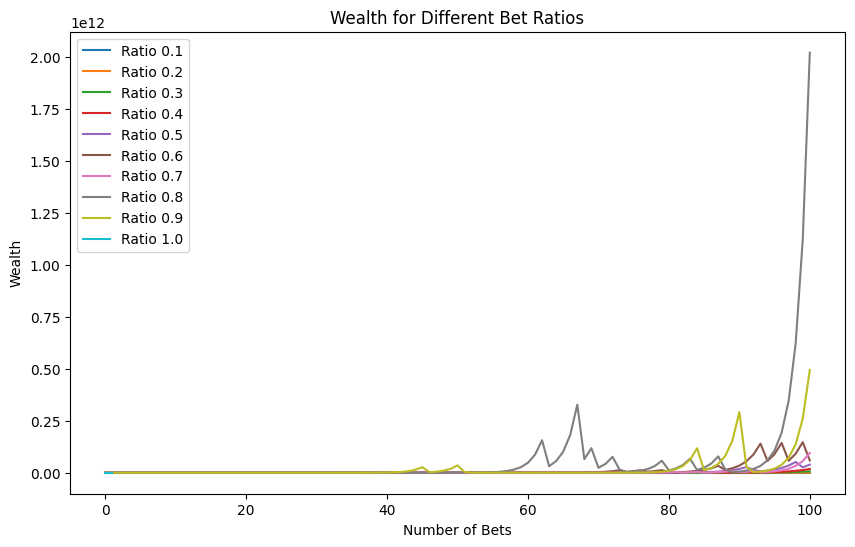

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Ë®≠ÂÆöËÆäÊï∏
initial_wealth = 1000
bet_ratios = [i/10 for i in range(1, 11)]  # Âæû10%Âà∞ÂÖ®ÊäºÁöÑ‰∏ãÊ≥®ÊØî‰æã
num_bets = 100
win_rate =0.8

df = pd.DataFrame()
# Ê®°Êì¨ÂêÑÊØî‰æã‰∏ãÊ≥®
for bet_ratio in bet_ratios:
  wealths = simulate_bets(initial_wealth, bet_ratio, win_rate, num_bets, verbose=False)
  df[f'Ratio {bet_ratio}'] = pd.Series(wealths)

final_wealths = df.iloc[-1]
max_ratio = final_wealths.idxmax() # ÊâæÂà∞ÊúÄÂ•ΩÁöÑ‰∏ãÊ≥®ÊØî‰æã
max_value = final_wealths.max()  # ÊúÄÈ´òË≥áÁî¢

print(f"ÊúÄÂ•ΩÁöÑ‰∏ãÊ≥®ÊØî‰æãÁÇ∫: {max_ratio}, ÊúÄÁµÇË≥áÁî¢Ôºö{max_value}")

# Áπ™Ë£ΩÂúñË°®
ax = df.plot(figsize=(10,6), legend=True, title='Wealth for Different Bet Ratios')
ax.set_xlabel('Number of Bets')
ax.set_ylabel('Wealth')
plt.show()

### 5Ô∏è‚É£ ÂÄçÂÄç‰∏ãÊ≥®Ê≥ï

‰∏ãÊ≥®ÊñπÊ≥ïÊéíÂêçÔºö
Á¨¨1Âêç:Ratio 0.8, ÊúÄÁµÇË≥áÁî¢Ôºö1.3246400682323328e+16
Á¨¨2Âêç:Ratio 0.5, ÊúÄÁµÇË≥áÁî¢Ôºö85001842482193.62
Á¨¨3Âêç:Ratio 0.6, ÊúÄÁµÇË≥áÁî¢Ôºö60122690119010.125
Á¨¨4Âêç:Ratio 0.7, ÊúÄÁµÇË≥áÁî¢Ôºö539096449187.02106
Á¨¨5Âêç:Ratio 0.4, ÊúÄÁµÇË≥áÁî¢Ôºö17917105954.19824
Á¨¨6Âêç:Ratio 0.3, ÊúÄÁµÇË≥áÁî¢Ôºö47119689.869811185
Á¨¨7Âêç:Ratio 0.2, ÊúÄÁµÇË≥áÁî¢Ôºö11069217.105402034
Á¨¨8Âêç:Ratio 0.9, ÊúÄÁµÇË≥áÁî¢Ôºö3793513.8777825534
Á¨¨9Âêç:Ratio 0.1, ÊúÄÁµÇË≥áÁî¢Ôºö136400.03265329747
Á¨¨10Âêç:double_bet, ÊúÄÁµÇË≥áÁî¢Ôºö1077.0
Á¨¨11Âêç:Ratio 1.0, ÊúÄÁµÇË≥áÁî¢Ôºönan


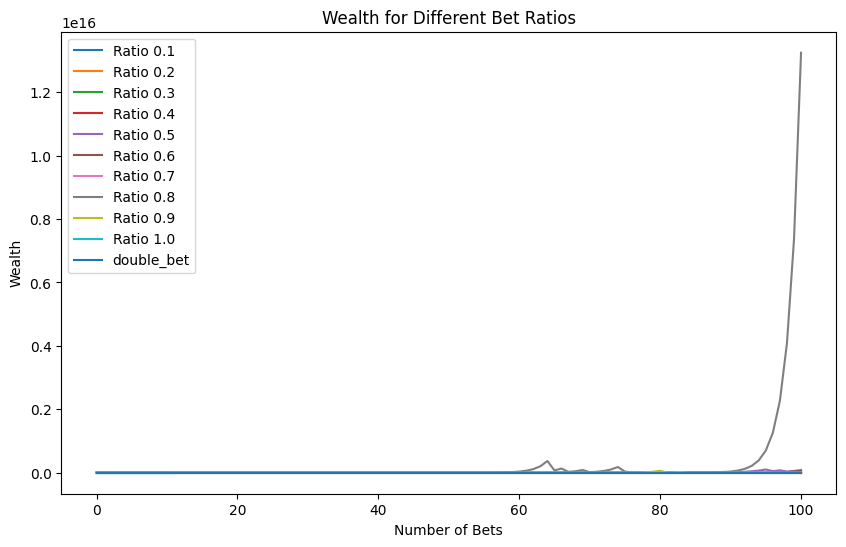

In [20]:
def double_bet(initial_wealth, win_rate, num_bets=100, odds=1):
  wealths = [initial_wealth]
  wealth = initial_wealth
  initial_bet = 1
  bet = initial_bet
  for i in range(num_bets):
    if random.uniform(0, 1) <= win_rate:
      # Ëã•Ë¥è‰∫ÜÔºåÂâá‰∏ãÊ≥®ÂàùÂßãÈáëÈ°ç
      wealth += bet * odds
      bet = initial_bet
    else:
      # Ëã•Ëº∏‰∫ÜÔºåÂâáÂä†ÂÄç‰∏ãÊ≥®ÈáëÈ°ç
      wealth -= bet
      bet *= 2
    wealths.append(wealth)

    # Ëº∏ÂÖâÂ∞±Ë∑≥Âá∫Ëø¥Âúà
    if wealth <= 0:
      break

  return wealths

# Ë®≠ÂÆöËÆäÊï∏
initial_wealth = 1000
bet_ratios = [i/10 for i in range(1, 11)]  # Âæû10%Âà∞ÂÖ®ÊäºÁöÑ‰∏ãÊ≥®ÊØî‰æã
num_bets = 100
win_rate =0.8

df = pd.DataFrame()
# Ê®°Êì¨ÂêÑÊØî‰æã‰∏ãÊ≥®
for bet_ratio in bet_ratios:
  wealths = simulate_bets(initial_wealth, bet_ratio, win_rate, num_bets, verbose=False)
  df[f'Ratio {bet_ratio}'] = pd.Series(wealths)

# ÂÄçÂÄç‰∏ãÊ≥®Ê≥ïÊ®°Êì¨ÁµêÊûú
wealths_double = double_bet(initial_wealth, win_rate, num_bets)
df['double_bet'] = pd.Series(wealths_double)

# ‰∏ãÊ≥®Ê≥ïÊéíÂêç
final_wealths = df.iloc[-1]
sorted_wealths = final_wealths.sort_values(ascending=False)
print("‰∏ãÊ≥®ÊñπÊ≥ïÊéíÂêçÔºö")
i = 1
for index, value in zip(sorted_wealths.index, sorted_wealths.values):
    print(f"Á¨¨{i}Âêç:{index}, ÊúÄÁµÇË≥áÁî¢Ôºö{value}")
    i += 1

# Áπ™Ë£ΩÂúñË°®
ax = df.plot(figsize=(10,6), legend=True, title='Wealth for Different Bet Ratios')
ax.set_xlabel('Number of Bets')
ax.set_ylabel('Wealth')
plt.show()

### 6Ô∏è‚É£ Âá±Âà©ÂÖ¨Âºè Kelly formula

In [21]:
def kelly_formula(p,b):
  # ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã
  best_bet = (b * p - (1 - p)) / b
  # Â¶ÇÊûú‰∏ãÊ≥®ÊØî‰æãÂ∞èÊñºÁ≠âÊñº 0ÔºåÂâáË®≠ÁÇ∫ 0
  if best_bet <= 0:
      return 0
  # ÂèñÂà∞Â∞èÊï∏ÈªûÂæåÂÖ©‰Ωç
  best_bet = round(best_bet,2)
  return best_bet

kelly_formula(p=0.8,b=1)

best_bet = kelly_formula(p=0.8, b=1)
print("ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫:", best_bet)

ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫: 0.6


### 7Ô∏è‚É£ ÂÆâË£ùÂèäÂåØÂÖ•Â•ó‰ª∂

In [22]:
!pip install yfinance==0.2.38
!pip install backtesting
!pip install bokeh==2.4.3 # Áπ™ÂúñÂ•ó‰ª∂
import yfinance as yf
import numpy as np
import pandas as pd # Ë≥áÊñôËôïÁêÜÂ•ó‰ª∂
from scipy.stats import norm
import datetime as dt # ÊôÇÈñìÂ•ó‰ª∂
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

### 8Ô∏è‚É£ ÂèñÂæóÂõûÊ∏¨ÁµêÊûú

In [23]:
# ÂèñÂæóËÇ°ÂÉπË≥áÊñô
stock_id = "2330.tw"
df = yf.download(stock_id, period="5y")
df['ma1'] = df['Close'].rolling(window=5).mean()
df['ma2'] = df['Close'].rolling(window=10).mean()


# ÂÆöÁæ©ÂõûÊ∏¨Á≠ñÁï•
class CrossStrategy(Strategy):
  def init(self):
    super().init()

  def next(self):
    if crossover(self.data.ma1, self.data.ma2):
      self.buy(size=1)
    elif crossover(self.data.ma2, self.data.ma1):
      self.sell(size=1)


# ÂõûÊ∏¨ÁµêÊûú
backtest = Backtest(df,
        CrossStrategy,
        cash=100000,
        commission=0.004,
        margin=1,
        hedging=False,
        trade_on_close=False,
        exclusive_orders=False,
        )
stats = backtest.run()
print(stats)

[*********************100%%**********************]  1 of 1 completed

Start                     2020-01-10 00:00:00
End                       2025-01-10 00:00:00
Duration                   1827 days 00:00:00
Exposure Time [%]                   84.703947
Equity Final [$]                    99421.336
Equity Peak [$]                    100529.686
Return [%]                          -0.578664
Buy & Hold Return [%]              224.005891
Return (Ann.) [%]                   -0.120197
Volatility (Ann.) [%]                0.287847
Sharpe Ratio                              0.0
Sortino Ratio                             0.0
Calmar Ratio                              0.0
Max. Drawdown [%]                   -1.132352
Avg. Drawdown [%]                   -0.095493
Max. Drawdown Duration      808 days 00:00:00
Avg. Drawdown Duration       84 days 00:00:00
# Trades                                   64
Win Rate [%]                           40.625
Best Trade [%]                      35.820355
Worst Trade [%]                    -21.024639
Avg. Trade [%]                    

### 9Ô∏è‚É£ Ë®àÁÆóË≥†Áéá„ÄÅÂèñÂæóÂãùÁéáÂèäÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã

In [24]:
# ÂÖàË®àÁÆóÂá∫Áç≤Âà©ÂèäËôßÊêçÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨
def trades_returns(returns):
    profits = returns[returns > 0].tolist()
    losses = returns[returns < 0].tolist()

    # Á¢∫‰øùÂàÜÊØç‰∏çÁÇ∫Èõ∂
    avg_profit = sum(profits) / len(profits) if profits else 0
    avg_loss = sum(losses) / len(losses) if losses else 0

    return avg_profit, avg_loss

avg_profit, avg_loss = trades_returns(stats['_trades']['ReturnPct'])
print(f"Áç≤Âà©ÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:{avg_profit*100:.2f}%")
print(f"ËôßÊêçÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:{avg_loss*100:.2f}%")
print("--------------------------")

# Áî®Âπ≥ÂùáÁç≤Âà©Èô§‰ª•Âπ≥ÂùáËôßÊêç‰æÜÊé®‰º∞Ë≥†Áéá
b = -avg_profit/avg_loss
p = stats['Win Rate [%]']/100
print(f"Ë≥†ÁéáÁÇ∫:{b:.2f}")
print(f"ÂãùÁéáÁÇ∫:{p*100:.2f}%")
print("--------------------------")

# ‰ª£ÂÖ•Âá±Âà©ÂÖ¨Âºè
best_bet = kelly_formula(p=p, b=b)
print("ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫:", best_bet)

Áç≤Âà©ÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:7.17%
ËôßÊêçÊôÇÁöÑÂπ≥ÂùáÂ†±ÈÖ¨:-6.18%
--------------------------
Ë≥†ÁéáÁÇ∫:1.16
ÂãùÁéáÁÇ∫:40.62%
--------------------------
ÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æãÁÇ∫: 0


### üîü Áî®Âá±Âà©ÂÖ¨Âºè‰æÜÊõ¥ÊîπÁ≠ñÁï•

In [25]:
# ÂÆöÁæ©ÂõûÊ∏¨Á≠ñÁï•
class CrossStrategy(Strategy):
  kelly_ratio = 0.3  # Âá±Âà©ÂÖ¨ÂºèÁöÑ‰∏ãÊ≥®ÊØîÁéá

  def init(self):
    super().init()

  def next(self):

    size = (self.equity * self.kelly_ratio) / self.data.Close[-1]
    size = max(round(size), 1) # Á¢∫‰øù‰∫§ÊòìËÇ°Êï∏ÁÇ∫Êï¥Êï∏

    if crossover(self.data.ma1, self.data.ma2):
        self.buy(size=size)
    elif crossover(self.data.ma2, self.data.ma1):
        self.sell(size=size)


# ÂõûÊ∏¨ÁµêÊûú
backtest = Backtest(df,
        CrossStrategy,
        cash=100000,
        commission=0.004,
        margin=1,
        hedging=False,
        trade_on_close=False,
        exclusive_orders=False,
        )
stats = backtest.run()
print(stats)

Start                     2020-01-10 00:00:00
End                       2025-01-10 00:00:00
Duration                   1827 days 00:00:00
Exposure Time [%]                   98.766447
Equity Final [$]                   118947.374
Equity Peak [$]                    143185.266
Return [%]                          18.947374
Buy & Hold Return [%]              224.005891
Return (Ann.) [%]                    3.661217
Volatility (Ann.) [%]                8.160519
Sharpe Ratio                          0.44865
Sortino Ratio                        0.713398
Calmar Ratio                         0.213381
Max. Drawdown [%]                  -17.158115
Avg. Drawdown [%]                   -1.938011
Max. Drawdown Duration      625 days 00:00:00
Avg. Drawdown Duration       51 days 00:00:00
# Trades                                  127
Win Rate [%]                         40.15748
Best Trade [%]                      44.828848
Worst Trade [%]                    -21.024639
Avg. Trade [%]                    

## 9-2 ÊäïË≥áÁµÑÂêàË≥áÈáëÂàÜÈÖçËàáÈ¢®Èö™ÁÆ°ÁêÜ

### 1Ô∏è‚É£1Ô∏è‚É£ ÊéõËºâÈõ≤Á´ØÁ°¨Á¢ü & ÂÆâË£ùÂ•ó‰ª∂

In [26]:
!pip install gdown
import gdown
import os
!git clone https://github.com/FlagTech/F3933.git
%cd F3933
from Stock_DB import StockDB
%cd ..
from google.colab import drive
drive.mount('/content/drive')

Cloning into 'F3933'...
remote: Enumerating objects: 562, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 562 (delta 87), reused 8 (delta 8), pack-reused 425 (from 1)
Receiving objects: 100% (562/562), 160.09 KiB | 8.00 MiB/s, done.
Resolving deltas: 100% (344/344), done.
/content/F3933
/content
Mounted at /content/drive


### 1Ô∏è‚É£2Ô∏è‚É£ ‰∏ãËºâË≥áÊñôÂ∫´

In [27]:
# ÊåáÂÆö‰∏ãËºâË∑ØÂæë
!mkdir -p "/content/drive/MyDrive/StockGPT/"
output_path = '/content/drive/MyDrive/StockGPT/'

# Ê™¢Êü•Ë≥áÊñôÂ∫´ÊòØÂê¶Â≠òÂú®
stock_db_path = output_path + 'stock.db'
if not os.path.exists(stock_db_path):
    print("‰∏ãËºâË≥áÊñôÂ∫´‰∏≠...")
    id = '1S5JE9ZF2hohRpvO8FikgLhQmN2DJrVgW'

    gdown.download(id=id, output=stock_db_path)
    print("‰∏ãËºâÂÆåÊàê")
else:
    print("ÁÑ°ÈúÄ‰∏ãËºâ")

ÁÑ°ÈúÄ‰∏ãËºâ


Ëã•ÈúÄÊõ¥Êñ∞Ë≥áÊñôÂ∫´, ÂèØÂü∑Ë°å‰ª•‰∏ãÁ®ãÂºèÁ¢º

```
stock_db = StockDB()
stock_db.renew()
stock_db.close()
```



### 1Ô∏è‚É£3Ô∏è‚É£ Ë®≠ÂÆöÊäïË≥áÁµÑÂêà

In [28]:
# ‰ª•10Ê™îËÇ°Á•®ÁÇ∫‰æã
stock_list = [1101, 1203, 1216, 1402, 1722,
               1762, 2330, 2608, 2884, 6405]

condition = f"ËÇ°Ëôü IN ({','.join(map(str, stock_list))})"

# ÂæûË≥áÊñôÂ∫´ÂèñÂá∫Ë≥áÊñô
stock_db = StockDB()
df = stock_db.get(table="Êó•È†ª", where=condition)
df = df.dropna()
df.tail()

ËÇ°Ëôü          Êó•Êúü        ÈñãÁõ§ÂÉπ        ÊúÄÈ´òÂÉπ        ÊúÄ‰ΩéÂÉπ        Êî∂Áõ§ÂÉπ  \
24233  6405  2024-12-13  35.700001  35.700001  34.099998  34.599998   
24234  6405  2024-12-16  34.450001  34.500000  33.349998  33.650002   
24235  6405  2024-12-17  33.849998  34.299999  33.500000  33.849998   
24236  6405  2024-12-18  33.849998  34.299999  33.200001  33.849998   
24237  6405  2024-12-19  32.900002  33.500000  32.900002  33.049999   

             ÈÇÑÂéüÂÉπ        Êàê‰∫§Èáè   ÊÆñÂà©Áéá Êó•Êú¨ÁõäÊØî  ËÇ°ÂÉπÊ∑®ÂÄºÊØî ‰∏âÂ§ßÊ≥ï‰∫∫Ë≤∑Ë≥£Ë∂ÖËÇ°Êï∏  ËûçË≥áË≤∑ÂÖ•  ËûçÂç∑Ë≥£Âá∫  
24233  34.599998  1285053.0  0.29    -   0.97   -41,465  68.0  23.0  
24234  33.650002   897300.0  0.30    -   0.95   336,533  70.0  39.0  
24235  33.849998   539005.0  0.30    -   0.95    -9,518  40.0  37.0  
24236  33.849998   675000.0  0.30    -   0.95   169,370  36.0  10.0  
24237  33.049999   395200.0  0.30    -   0.93    67,924  11.0   7.0

###1Ô∏è‚É£4Ô∏è‚É£ Ë®àÁÆóÊØèÊúàÁöÑÊº≤ÂπÖÊàñË∑åÂπÖ

In [29]:
# Ë®≠ÂÆöÊó•ÊúüÁÇ∫Á¥¢Âºï
df['Êó•Êúü'] = pd.to_datetime(df['Êó•Êúü'])
df.set_index('Êó•Êúü', inplace=True)
df = df[df.index > '2017-01-01']

# Ë®ìÁ∑¥Ë≥áÊñôËàáÊ∏¨Ë©¶Ë≥áÊñô
start = "2021-01-01"
end = "2023-10-10"
train_df = df[df.index <= start]
test_df = df[(df.index > start) & (df.index <= end)]

# ÂèñÂá∫ÊØèÊúàÊúÄÂæå‰∏ÄÂÄã‰∫§ÊòìÊó•ÁöÑÊî∂Áõ§ÂÉπ
monthly_closing = train_df.groupby('ËÇ°Ëôü')\
                          .resample('M')['Êî∂Áõ§ÂÉπ'].last()

# Ë®àÁÆóÊØèÊúàÁöÑÊº≤ÂπÖÊàñË∑åÂπÖ
monthly_return = monthly_closing.groupby(level=0)\
                                .pct_change().fillna(0)

print(monthly_return)

ËÇ°Ëôü    Êó•Êúü        
1101  2017-01-31    0.000000
      2017-02-28    0.063559
      2017-03-31   -0.035857
      2017-04-30   -0.033058
      2017-05-31   -0.019943
                      ...   
6405  2020-08-31   -0.044855
      2020-09-30    0.038674
      2020-10-31   -0.061170
      2020-11-30    0.084986
      2020-12-31    0.120105
Name: Êî∂Áõ§ÂÉπ, Length: 480, dtype: float64


<ipython-input-29-0bb49d079779>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Êî∂Áõ§ÂÉπ'].last()


###1Ô∏è‚É£5Ô∏è‚É£ Ë®àÁÆóÊØèÊ™îËÇ°Á•®ÁöÑÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã

In [30]:
results = []

# Ë®àÁÆóÊØèÊ™îËÇ°Á•®ÁöÑÊúÄ‰Ω≥‰∏ãÊ≥®ÊØî‰æã
for stock in stock_list:
    str_stock = str(stock)
    avg_profit, avg_loss = trades_returns(monthly_return[str_stock])
    b = -avg_profit/avg_loss # Ë≥†Áéá
    p = len(monthly_return[str_stock][monthly_return[str_stock] > 0]
            ) / len(monthly_return[str_stock])  # ÂãùÁéá
    best_bet = kelly_formula(p=p, b=b) # ‰∏ãÊ≥®ÊØî‰æã

    results.append([stock, avg_profit, avg_loss, p, b, best_bet])

# Âêà‰ΩµÁÇ∫ DataFrame
df_results = pd.DataFrame(results,
              columns=['ËÇ°Ëôü', 'Âπ≥ÂùáÊº≤ÂπÖ', 'Âπ≥ÂùáË∑åÂπÖ',
                  'ÂãùÁéá', 'Ë≥†Áéá', '‰∏ãÊ≥®ÊØî‰æã'])

total_bet = df_results['‰∏ãÊ≥®ÊØî‰æã'].sum()
df_results['Ë≥áÈáëÂàÜÈÖç'] = df_results['‰∏ãÊ≥®ÊØî‰æã'] / total_bet

df_results

ËÇ°Ëôü      Âπ≥ÂùáÊº≤ÂπÖ      Âπ≥ÂùáË∑åÂπÖ        ÂãùÁéá        Ë≥†Áéá  ‰∏ãÊ≥®ÊØî‰æã      Ë≥áÈáëÂàÜÈÖç
0  1101  0.042147 -0.033390  0.562500  1.262293  0.22  0.111111
1  1203  0.024024 -0.014281  0.625000  1.682224  0.40  0.202020
2  1216  0.040596 -0.033364  0.520833  1.216760  0.13  0.065657
3  1402  0.044509 -0.049732  0.562500  0.894973  0.07  0.035354
4  1722  0.037341 -0.038913  0.583333  0.959612  0.15  0.075758
5  1762  0.099330 -0.060044  0.520833  1.654290  0.23  0.116162
6  2330  0.067950 -0.047247  0.583333  1.438197  0.29  0.146465
7  2608  0.033360 -0.032416  0.500000  1.029125  0.01  0.005051
8  2884  0.036476 -0.043529  0.708333  0.837968  0.36  0.181818
9  6405  0.096346 -0.060858  0.458333  1.583135  0.12  0.060606

###1Ô∏è‚É£6Ô∏è‚É£ ÊØîËºÉÂπ≥ÂùáÂàÜÈÖçËàá‰ΩøÁî®‰∏ãÊ≥®ÊØî‰æãÁöÑÂ†±ÈÖ¨

In [31]:
# Ë®àÁÆóÊ∏¨Ë©¶Ë≥áÊñôÁöÑÊØèÊúàÊº≤ÂπÖÊàñË∑åÂπÖ
monthly_closing_test = test_df.groupby('ËÇ°Ëôü')\
                .resample('M')['Êî∂Áõ§ÂÉπ'].last()
monthly_return_test = monthly_closing_test.groupby(level=0)\
                                .pct_change().fillna(0)
first_price = monthly_closing_test.groupby('ËÇ°Ëôü').first()
last_price = monthly_closing_test.groupby('ËÇ°Ëôü').last()


# Ë®àÁÆóÂ†±ÈÖ¨Áéá
returns = (last_price /first_price)
df_results['ËÇ°Ëôü'] = df_results['ËÇ°Ëôü'].astype(str)
df_results_test = df_results.merge(
    returns.rename('Â†±ÈÖ¨Áéá'), left_on='ËÇ°Ëôü', right_index=True)
display(df_results_test)

# Ë®≠ÂÆöÂàùÂßãË≥áÈáë
initial_capital = 100000

# Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•ÁöÑÁµêÊûú
avg = initial_capital / len(stock_list)
avg_strategy = sum(df_results_test['Â†±ÈÖ¨Áéá'] * avg)

# ‰ΩøÁî®‰∏ãÊ≥®ÊØî‰æãÁöÑÁ≠ñÁï•ÁµêÊûú
bet_strategy = sum(df_results_test['Â†±ÈÖ¨Áéá'] *(
    df_results_test['Ë≥áÈáëÂàÜÈÖç'] * initial_capital))

print(f"Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: {avg_strategy}")
print(f"‰∏ãÊ≥®ÊØî‰æãÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: {bet_strategy}")

<ipython-input-31-c1412ce8a405>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample('M')['Êî∂Áõ§ÂÉπ'].last()
<ipython-input-31-c1412ce8a405>:5: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  .pct_change().fillna(0)


ËÇ°Ëôü      Âπ≥ÂùáÊº≤ÂπÖ      Âπ≥ÂùáË∑åÂπÖ        ÂãùÁéá        Ë≥†Áéá  ‰∏ãÊ≥®ÊØî‰æã      Ë≥áÈáëÂàÜÈÖç       Â†±ÈÖ¨Áéá
0  1101  0.042147 -0.033390  0.562500  1.262293  0.22  0.111111  0.898572
1  1203  0.024024 -0.014281  0.625000  1.682224  0.40  0.202020  1.166667
2  1216  0.040596 -0.033364  0.520833  1.216760  0.13  0.065657  1.010294
3  1402  0.044509 -0.049732  0.562500  0.894973  0.07  0.035354  1.098077
4  1722  0.037341 -0.038913  0.583333  0.959612  0.15  0.075758  1.208748
5  1762  0.099330 -0.060044  0.520833  1.654290  0.23  0.116162  1.099251
6  2330  0.067950 -0.047247  0.583333  1.438197  0.29  0.146465  0.900169
7  2608  0.033360 -0.032416  0.500000  1.029125  0.01  0.005051  0.899149
8  2884  0.036476 -0.043529  0.708333  0.837968  0.36  0.181818  1.215912
9  6405  0.096346 -0.060858  0.458333  1.583135  0.12  0.060606  1.284289

Âπ≥ÂùáÂàÜÈÖçÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: 107811.2775886113
‰∏ãÊ≥®ÊØî‰æãÁ≠ñÁï•ÁöÑÊúÄÁµÇË≥áÈáë: 109524.21874729404


###1Ô∏è‚É£7Ô∏è‚É£ ËàáÂ§ßÁõ§Á∏æÊïàÈÄ≤Ë°åÊØîËºÉ

[*********************100%%**********************]  1 of 1 completed
<ipython-input-32-82a7fff6740d>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  market_closing = market_index.resample('M')['Close'].last()


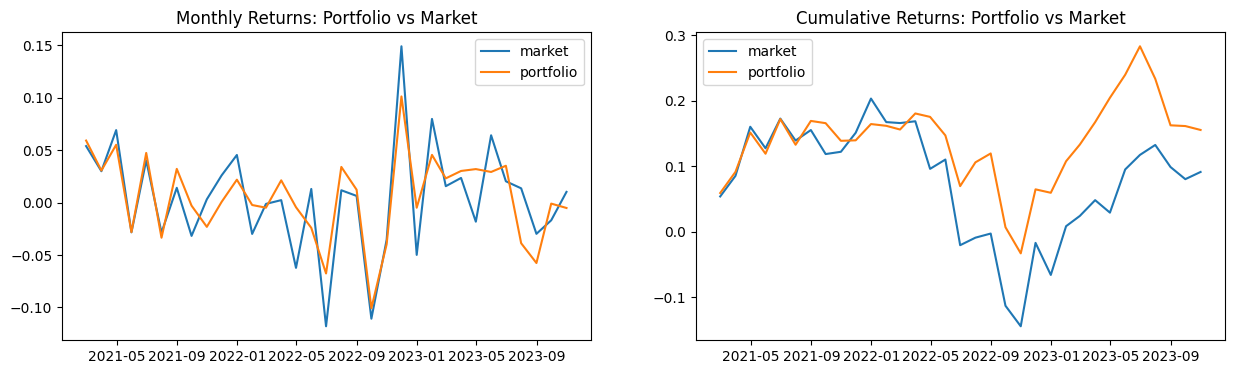

In [32]:
# ÊäïÁµÑÊØèÊúàÂ†±ÈÖ¨
returns_df = pd.concat([monthly_return_test[str(stock)]
                         for stock in stock_list], axis=1)
returns_df.columns = stock_list
weights = df_results['Ë≥áÈáëÂàÜÈÖç'].values
returns_df['ÊäïÁµÑÂ†±ÈÖ¨'] = returns_df[stock_list].dot(weights)

# Ë®àÁÆóÂ§ßÁõ§Â†±ÈÖ¨
market_index = yf.download("^TWII",start=start,end=end)
market_closing = market_index.resample('M')['Close'].last()
market_return = market_closing.pct_change().fillna(0)
returns_df['Â§ßÁõ§Â†±ÈÖ¨'] = market_return

# Á¥ØÁ©çÂ†±ÈÖ¨
returns_df['ÊäïÁµÑÁ¥ØÁ©çÂ†±ÈÖ¨'] = (1 + returns_df['ÊäïÁµÑÂ†±ÈÖ¨']).cumprod() - 1
returns_df['Â§ßÁõ§Á¥ØÁ©çÂ†±ÈÖ¨'] = (1 + returns_df['Â§ßÁõ§Â†±ÈÖ¨']).cumprod() - 1

# Áπ™Ë£ΩÂ§ßÁõ§ËàáÊäïÁµÑÁ∏æÊïà
returns_df = returns_df.drop(returns_df.index[0])
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 4))

ax1.plot(returns_df['Â§ßÁõ§Â†±ÈÖ¨'], label="market")
ax1.plot(returns_df['ÊäïÁµÑÂ†±ÈÖ¨'], label="portfolio")
ax1.set_title("Monthly Returns: Portfolio vs Market")
ax1.legend()

ax2.plot(returns_df['Â§ßÁõ§Á¥ØÁ©çÂ†±ÈÖ¨'], label="market")
ax2.plot(returns_df['ÊäïÁµÑÁ¥ØÁ©çÂ†±ÈÖ¨'], label="portfolio")
ax2.set_title("Cumulative Returns: Portfolio vs Market")
ax2.legend()

plt.show()

###1Ô∏è‚É£8Ô∏è‚É£ ÊäïË≥áÁµÑÂêàÊ®ôÊ∫ñÂ∑Æ (œÉ)

In [33]:
# Ë®àÁÆóÂÖ±ËÆäÁï∞Êï∏Áü©Èô£
stk_returns_df = returns_df.iloc[:, :-4]
cov_matrix = stk_returns_df.cov()
display(cov_matrix)

# Ë®àÁÆóÊäïË≥áÁµÑÂêàÁöÑÂ†±ÈÖ¨ËàáÊ®ôÊ∫ñÂ∑Æ
portfolio_return = np.dot(weights, stk_returns_df.mean().values)
portfolio_std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix.values, weights)))

# ËΩâÊèõÊàêÂπ¥Âåñ
annualized_portfolio_return = (1 + portfolio_return)**12 - 1
annualized_portfolio_std = portfolio_std * (12**0.5)
annualized_market_return = (1 + market_return.mean())**12 - 1
annualized_market_std = market_return.std() * (12**0.5)

print(f"ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:{annualized_portfolio_return*100:.2f}%")
print(f"ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:{annualized_portfolio_std*100:.2f}%")

print(f"Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:{annualized_market_return*100:.2f}%")
print(f"Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:{annualized_market_std*100:.2f}%")

1101      1203      1216      1402      1722      1762      2330  \
1101  0.004561  0.000414  0.000602  0.001047  0.002989  0.002175  0.002499   
1203  0.000414  0.001502  0.000350  0.000535  0.000050  0.000820  0.001437   
1216  0.000602  0.000350  0.001127  0.000170  0.000113  0.001444  0.000276   
1402  0.001047  0.000535  0.000170  0.002178  0.000612  0.001772  0.000339   
1722  0.002989  0.000050  0.000113  0.000612  0.004117  0.001316  0.001476   
1762  0.002175  0.000820  0.001444  0.001772  0.001316  0.014119  0.002504   
2330  0.002499  0.001437  0.000276  0.000339  0.001476  0.002504  0.006524   
2608  0.001317  0.000246 -0.000052  0.000033 -0.000731  0.000869  0.001485   
2884  0.001795  0.000288  0.000293  0.000619  0.001803  0.001708  0.001875   
6405  0.001320 -0.000281 -0.000408  0.002654  0.002414  0.002995  0.001049   

          2608      2884      6405  
1101  0.001317  0.001795  0.001320  
1203  0.000246  0.000288 -0.000281  
1216 -0.000052  0.000293 -0.000408  
1402  0.000033  0.000619  0.002654  
1722 -0.000731  0.001803  0.002414  
1762  0.000869  0.001708  0.002995  
2330  0.001485  0.001875  0.001049  
2608  0.011438 -0.000281  0.003025  
2884 -0.000281  0.002324  0.001105  
6405  0.003025  0.001105  0.023437

ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:6.42%
ÊäïË≥áÁµÑÂêàÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:14.12%
Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÂ†±ÈÖ¨Áéá:4.70%
Â§ßÁõ§ÊåáÊï∏ÁöÑÂπ¥ÂåñÊ®ôÊ∫ñÂ∑Æ:17.68%


###1Ô∏è‚É£9Ô∏è‚É£ È¢®Èö™ÂÄº (Value at Risk, VaR)

In [34]:
confidence_level = 0.95

# ÊúàÈ†ª VaR
VaR = portfolio_return - portfolio_std * norm.ppf(confidence_level)
# Âπ¥È†ª VaR
VaR_annualized = VaR * (12**0.5)

print(f"Âú® {confidence_level*100:.0f}% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã,\
 ‰∏ãÂÄãÊúàÁöÑÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö{VaR*100:.2f}%")
print(f"Âú® {confidence_level*100:.0f}% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã,\
 ÊòéÂπ¥ÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö{VaR_annualized*100:.2f}%")

Âú® 95% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã, ‰∏ãÂÄãÊúàÁöÑÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö-6.19%
Âú® 95% ÁöÑ‰ø°ÂøÉÊ∞¥Ê∫ñ‰∏ã, ÊòéÂπ¥ÊúÄÂ§ßÂèØËÉΩÊêçÂ§±ÁÇ∫Ôºö-21.43%


###2Ô∏è‚É£0Ô∏è‚É£ beta ‰øÇÊï∏ (Œ≤)


In [35]:
# Ë®àÁÆóŒ≤‰øÇÊï∏
portfolio_market_cov = returns_df[['ÊäïÁµÑÂ†±ÈÖ¨', 'Â§ßÁõ§Â†±ÈÖ¨']].cov()\
                               .iloc[0, 1]
market_var = returns_df['Â§ßÁõ§Â†±ÈÖ¨'].var()
portfolio_beta = portfolio_market_cov / market_var

print(f"ÊäïÁµÑËàáÂ§ßÁõ§ÁöÑÂÖ±ËÆäÁï∞Êï∏ÁÇ∫Ôºö{portfolio_market_cov:.5f},\
    Â§ßÁõ§ËÆäÁï∞Êï∏ÁÇ∫Ôºö{market_var:.5f}")
print(f"ÊäïË≥áÁµÑÂêàÁöÑŒ≤‰øÇÊï∏Ôºö{portfolio_beta:.2f}")

ÊäïÁµÑËàáÂ§ßÁõ§ÁöÑÂÖ±ËÆäÁï∞Êï∏ÁÇ∫Ôºö0.00177,    Â§ßÁõ§ËÆäÁï∞Êï∏ÁÇ∫Ôºö0.00269
ÊäïË≥áÁµÑÂêàÁöÑŒ≤‰øÇÊï∏Ôºö0.66


###2Ô∏è‚É£1Ô∏è‚É£ Â§èÊôÆÊØîÁéá (Sharpe Ratio)

In [36]:
# Ë®≠ÂÆöÁÑ°È¢®Èö™Âà©Áéá
risk_free_rate = 0.015/12  # ËΩâÊèõÊàêÊúàÈ†ª (ÁÆóË°ìÂπ≥Âùá)

average_return = returns_df['ÊäïÁµÑÂ†±ÈÖ¨'].mean()
portfolio_std = returns_df['ÊäïÁµÑÂ†±ÈÖ¨'].std()

sharpe_ratio = (average_return - risk_free_rate) / portfolio_std
sharpe_ratio_annualized = sharpe_ratio * (12**0.5)

print(f"ÊäïË≥áÁµÑÂêàÁöÑÂ§èÊôÆÊØîÁéáÔºö{sharpe_ratio:.2f}")
print(f"Âπ¥ÂåñÁöÑÂ§èÊôÆÊØîÁéáÔºö{sharpe_ratio_annualized:.2f}")

ÊäïË≥áÁµÑÂêàÁöÑÂ§èÊôÆÊØîÁéáÔºö0.10
Âπ¥ÂåñÁöÑÂ§èÊôÆÊØîÁéáÔºö0.34
